# MLFLOW TUTORIAL

In [18]:
#import packages
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import mlflow
import mlflow.sklearn
import pickle
from datetime import datetime
import mlflow
from mlflow.tracking import MlflowClient
import numpy as np
import mlflow.pyfunc

In [19]:
# Load the Iris dataset
iris = load_iris()

## First Model 

Accuracy: 0.93
Precision: 0.95
Recall: 0.93
F1 Score: 0.93
ROC-AUC Score: 1.00
Log Loss: 0.12


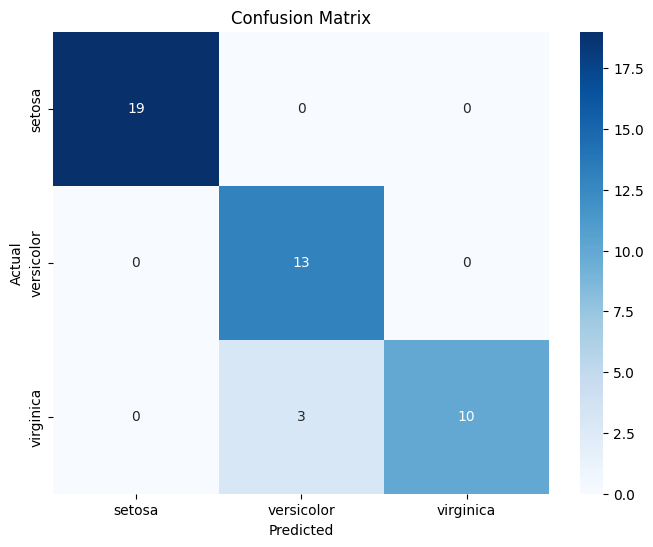

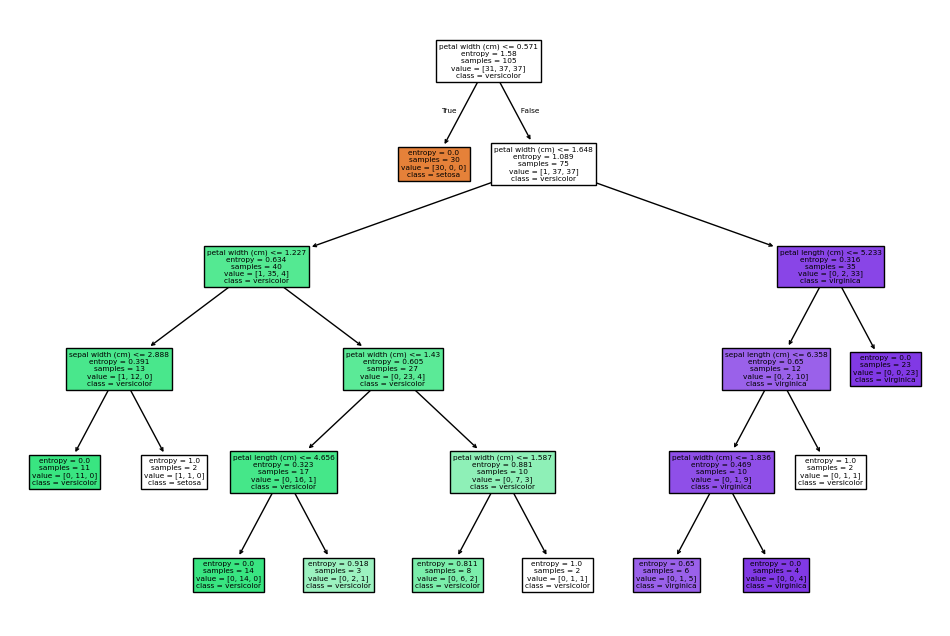

2024/07/26 12:24:35 INFO mlflow.tracking.fluent: Experiment with name 'Iris Decision Tree Experiment' does not exist. Creating a new experiment.


Metrics logged in MLflow


In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix1.png")
plt.show()

# Decision tree visualization
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.savefig("decision_tree1.png")
plt.show()

# Save the model
model_path = "decision_tree_model1.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(clf, file)

# Log to MLflow
experiment_name = "Iris Decision Tree Experiment"
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name="Run 1"):
    mlflow.log_params({
        "feature_set": "All Features",
        "criterion": "entropy",
        "splitter": "random",
        "max_depth": 5,
        "min_samples_split": 4,
        "min_samples_leaf": 2,
        "random_state": 42
    })
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "log_loss": log_loss_value
    })
    mlflow.log_artifact("confusion_matrix1.png")
    mlflow.log_artifact("decision_tree1.png")
    mlflow.log_artifact(model_path)
    mlflow.sklearn.log_model(clf, "model")
    mlflow.set_tags({
        "model_type": "Decision Tree",
        "experimenter": "Abhinav",
        "purpose": "Initial Model",
        "date": datetime.now().strftime("%Y-%m-%d")
    })

print("Metrics logged in MLflow")


## Second Model

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


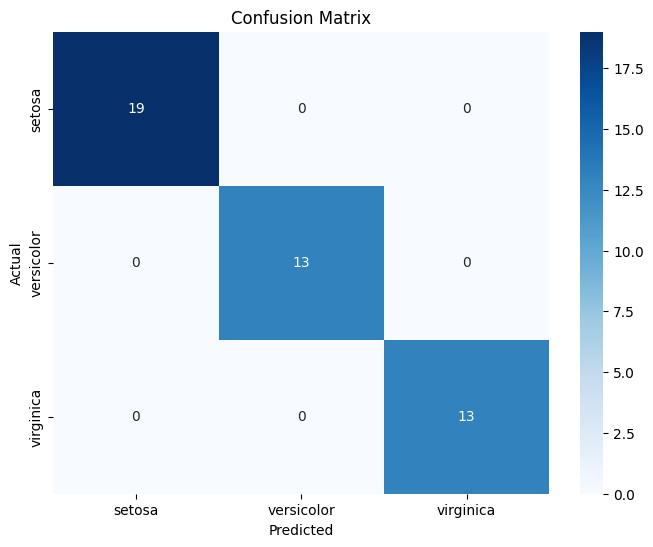

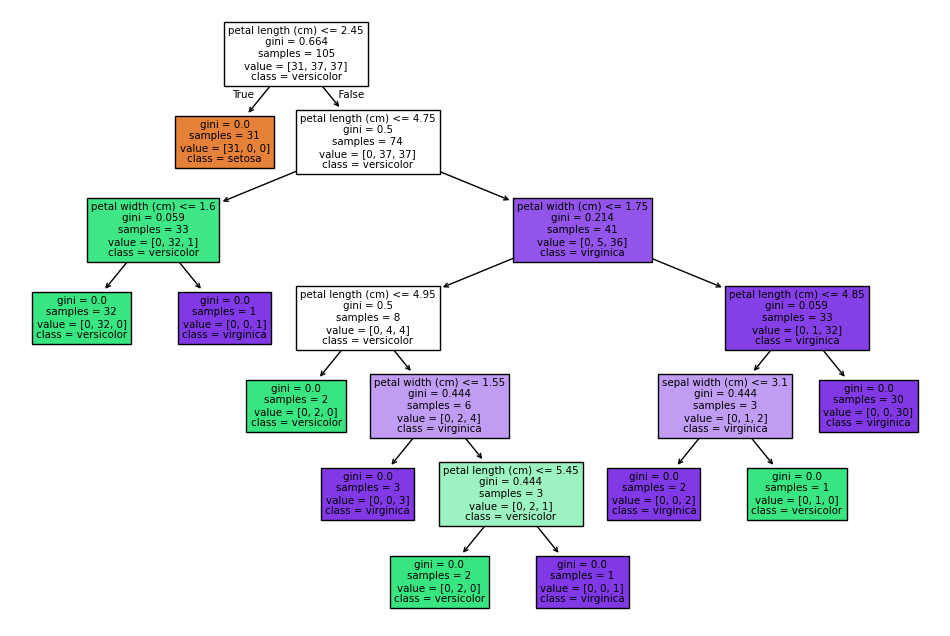

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1_score: 1.00
Roc_auc: 1.00
Log_loss: 0.00
Metrics logged in MLflow


In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
confusion_matrix_path = "confusion_matrix2.png"
plt.savefig(confusion_matrix_path)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
decision_tree_path = "decision_tree2.png"
plt.savefig(decision_tree_path)
plt.show()

# Save the model
model_path = "decision_tree_model2.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(clf, file)

# Calculate additional metrics
metrics = {
    "accuracy": accuracy,
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1_score": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'),
    "log_loss": log_loss(y_test, clf.predict_proba(X_test))
}

# Print additional metrics
for metric, value in metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")

# Log to MLflow
mlflow.set_experiment("Iris Decision Tree Experiment")
with mlflow.start_run(run_name="Run 2"):
    mlflow.log_params(clf.get_params())
    mlflow.log_metrics(metrics)
    mlflow.log_artifact("confusion_matrix2.png")
    mlflow.log_artifact("decision_tree2.png")
    mlflow.log_artifact(model_path)
    mlflow.sklearn.log_model(clf, "model")
    mlflow.set_tags({
        "model_type": "Decision Tree",
        "experimenter": "Abhinav",
        "purpose": "Parameter Change",
        "date": datetime.now().strftime("%Y-%m-%d")
    })

print("Metrics logged in MLflow")


## Third Model - Sepal Features

Accuracy: 0.71
Confusion Matrix:
[[18  1  0]
 [ 0  7  6]
 [ 0  6  7]]


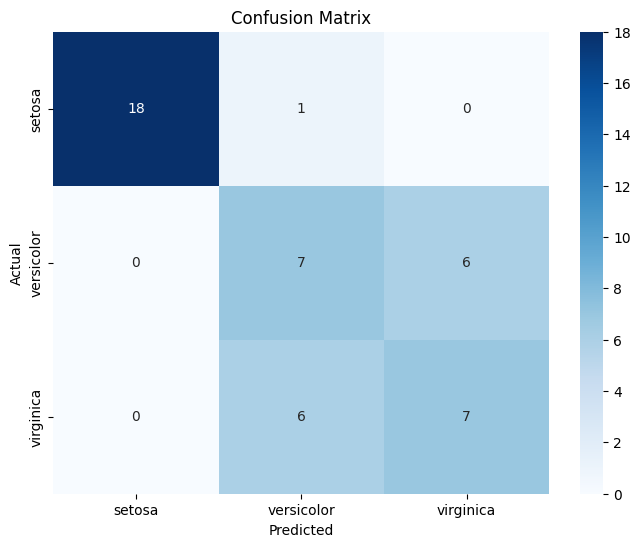

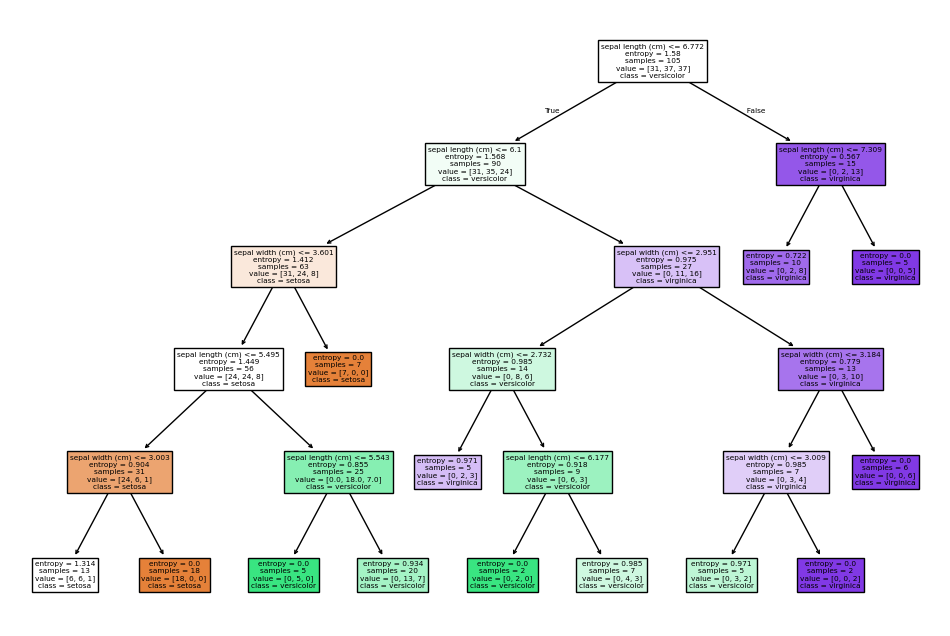

Accuracy: 0.71
Precision: 0.72
Recall: 0.71
F1_score: 0.72
Roc_auc: 0.84
Log_loss: 4.31
Metrics logged in MLflow


In [22]:
X = iris.data[:, :2]  # Only use sepal length and sepal width
y = iris.target  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
confusion_matrix_path = "confusion_matrix3.png"
plt.savefig(confusion_matrix_path)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.savefig("decision_tree3.png")
plt.show()

# Save the model
model_path = "decision_tree_model3.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(clf, file)

# Calculate additional metrics
metrics = {
    "accuracy": accuracy,
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1_score": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'),
    "log_loss": log_loss(y_test, clf.predict_proba(X_test))
}

# Print additional metrics
for metric, value in metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")

# Log to MLflow
mlflow.set_experiment("Iris Decision Tree Experiment")
with mlflow.start_run(run_name="Run 3"):
    mlflow.log_params(clf.get_params())
    mlflow.log_params({"feature_set": "Sepal Features"})
    mlflow.log_metrics(metrics)
    mlflow.log_artifact("confusion_matrix3.png")
    mlflow.log_artifact("decision_tree3.png")
    mlflow.log_artifact(model_path)
    mlflow.sklearn.log_model(clf, "model")
    mlflow.set_tags({
        "model_type": "Decision Tree",
        "experimenter": "Abhinav",
        "purpose": "Feature reduction experiment",
        "date": datetime.now().strftime("%Y-%m-%d")
    })

print("Metrics logged in MLflow")


## Fourth Model - Petal Features 

Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


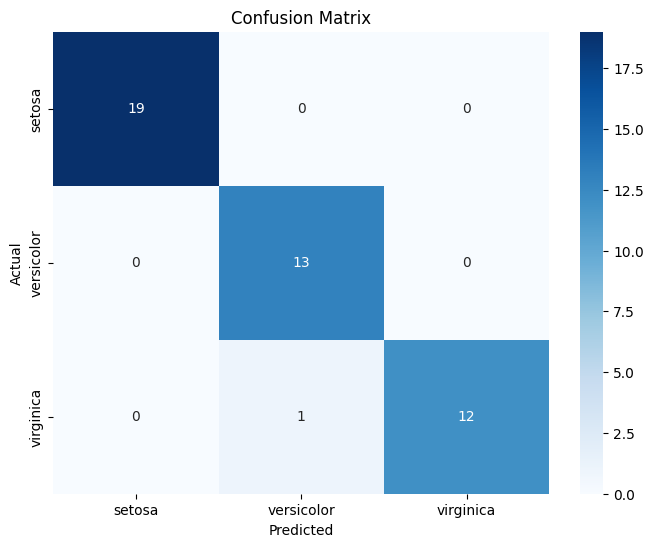

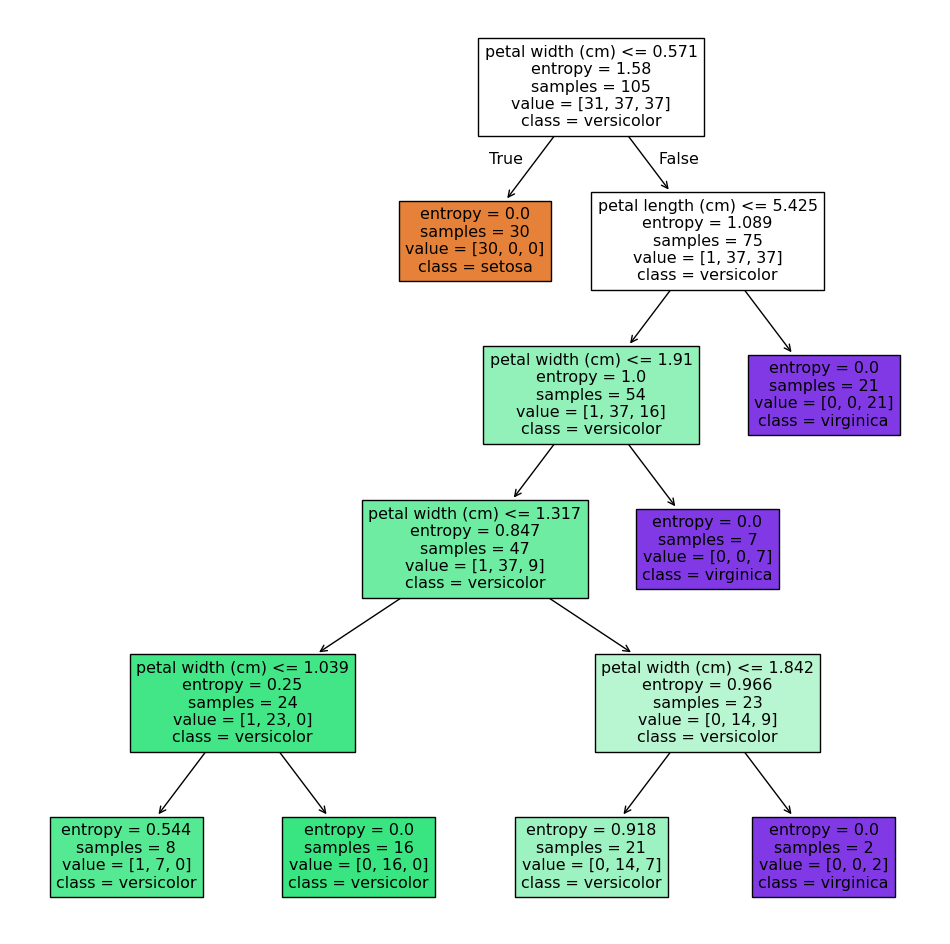

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1_score: 0.98
Roc_auc: 0.99
Log_loss: 0.10
Metrics logged in MLflow


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import mlflow
import mlflow.sklearn
from datetime import datetime
import pickle

# Load the iris dataset
iris = load_iris()

# Only use petal length and petal width
X = iris.data[:, 2:]  
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
confusion_matrix_path = "confusion_matrix_petal4.png"
plt.savefig(confusion_matrix_path)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 12))
from sklearn import tree
tree.plot_tree(clf, feature_names=['petal length (cm)', 'petal width (cm)'], class_names=iris.target_names, filled=True)
plt.savefig("decision_tree_petal4.png")
plt.show()

# Save the model
model_path = "decision_tree_model_petal4.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(clf, file)

# Calculate additional metrics
metrics = {
    "accuracy": accuracy,
    "precision": precision_score(y_test, y_pred, average='weighted'),
    "recall": recall_score(y_test, y_pred, average='weighted'),
    "f1_score": f1_score(y_test, y_pred, average='weighted'),
    "roc_auc": roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'),
    "log_loss": log_loss(y_test, clf.predict_proba(X_test))
}

# Print additional metrics
for metric, value in metrics.items():
    print(f"{metric.capitalize()}: {value:.2f}")

# Log to MLflow
mlflow.set_experiment("Iris Decision Tree Experiment")
with mlflow.start_run(run_name="Run 4"):
    mlflow.log_params(clf.get_params())
    mlflow.log_params({"feature_set": "Petal Features"})
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(confusion_matrix_path)
    mlflow.log_artifact("decision_tree_petal4.png")
    mlflow.log_artifact(model_path)
    mlflow.sklearn.log_model(clf, "model")
    mlflow.set_tags({
        "model_type": "Decision Tree",
        "experimenter": "Abhinav",
        "purpose": "Petal features experiment",
        "date": datetime.now().strftime("%Y-%m-%d")
    })

print("Metrics logged in MLflow")


## Making Prediction through Run-ID

In [27]:
# Initialize the MLflow client
client = MlflowClient()

# Load the model from MLflow
model_uri = "runs:/1fbf46f45ad64559928ec1290c8e975d/model"  
loaded_model = mlflow.sklearn.load_model(model_uri)

# Sample data for prediction
sample_data = np.array([[5.1, 3.5, 1.4, 0.2],  
                        [7.0, 3.2, 4.7, 1.4],  
                        [6.3, 3.3, 6.0, 2.5]])

# Make predictions
predictions = loaded_model.predict(sample_data)
predicted_classes = [iris.target_names[p] for p in predictions]

print("Predicted classes for the sample data:")
for i, sample in enumerate(sample_data):
    print(f"Sample {i + 1}: {sample} -> Predicted class: {predicted_classes[i]}")


Predicted classes for the sample data:
Sample 1: [5.1 3.5 1.4 0.2] -> Predicted class: setosa
Sample 2: [7.  3.2 4.7 1.4] -> Predicted class: versicolor
Sample 3: [6.3 3.3 6.  2.5] -> Predicted class: virginica


## Registering A Model

In [24]:
# The run_id from the logged model
run_id = "1fbf46f45ad64559928ec1290c8e975d"  

# Name of the model to be registered
model_name = "Iris_Decision_Tree_Model"

# Register the model
model_uri = f"runs:/{run_id}/model"
model_details = mlflow.register_model(model_uri=model_uri, name=model_name)

client = MlflowClient()
# Tag the model version as 'Archive'
client.set_model_version_tag(
    name=model_name,
    version=model_details.version,
    key="stage",
    value="Staging"
)

print(f"Model registered as {model_name} with version {model_details.version} and tagged as 'Staging'.")


Model registered as Iris_Decision_Tree_Model with version 1 and tagged as 'Staging'.


Successfully registered model 'Iris_Decision_Tree_Model'.
Created version '1' of model 'Iris_Decision_Tree_Model'.


## Changing Stage of Registered Model

In [25]:
# Set the model name and version
model_name = "Iris_Decision_Tree_Model"  
model_version = 1  

# Tag the model version as 'Archived'
client.set_model_version_tag(
    name=model_name,
    version=model_version,
    key="stage",
    value="Production",
)

print(f"Model {model_name} version {model_version} has been tagged as 'Production'.")

Model Iris_Decision_Tree_Model version 1 has been tagged as 'Production'.


## Deleting A Registered Model

In [26]:
# Set the model name and version
model_name = "Iris_Decision_Tree_Model"  
model_version = 2

# Delete the model version
client.delete_model_version(
    name=model_name,
    version=model_version,
)

print(f"Model {model_name} version {model_version} has been deleted.")

Model Iris_Decision_Tree_Model version 2 has been deleted.


## Making Predictions From A Staged Model

In [28]:
client = mlflow.MlflowClient()

# Load the model tagged as 'Production'
model_name = "Iris_Decision_Tree_Model"
tag_key = "stage"
tag_value = "Production"

production_version = 1

# Load the model using the identified version
model_uri = f"models:/{model_name}/{production_version}"
loaded_model = mlflow.pyfunc.load_model(model_uri)

# Sample data for prediction
sample_data = np.array([[5.1, 3.5, 1.4, 0.2],  
                        [7.0, 3.2, 4.7, 1.4],  
                        [6.3, 3.3, 6.0, 2.5]]) 

# Make predictions
predictions = loaded_model.predict(sample_data)

# Define the class names manually
class_names = ["setosa", "versicolor", "virginica"]

# Map predictions to class names
predicted_classes = [class_names[int(p)] for p in predictions]

print("Predicted classes for the sample data:")
for i, sample in enumerate(sample_data):
    print(f"Sample {i + 1}: {sample} -> Predicted class: {predicted_classes[i]}")

Predicted classes for the sample data:
Sample 1: [5.1 3.5 1.4 0.2] -> Predicted class: setosa
Sample 2: [7.  3.2 4.7 1.4] -> Predicted class: versicolor
Sample 3: [6.3 3.3 6.  2.5] -> Predicted class: virginica


## Prediction Through Invocation End Point

In [29]:
import requests
import numpy as np

# Define the endpoint
endpoint = "http://localhost:7777/invocations"

# Prepare your sample data
sample_data = np.array([[5.1, 3.5, 1.4, 0.2],  
                        [7.0, 3.2, 4.7, 1.4],  
                        [6.3, 3.3, 6.0, 2.5]]) 

# Convert data to a list
data_request = {
    "instances": sample_data.tolist()
}

# Send the request to the model serving endpoint
response = requests.post(endpoint, json=data_request)

# Check response status code
if response.status_code == 200:
    # Parse the response
    predictions = response.json()["predictions"]
    print("Predictions for the sample data:")
    for i, prediction in enumerate(predictions):
        print(f"Sample {i + 1}: {prediction}")
else:
    print(f"Request failed with status code {response.status_code}")
    print(f"Response content: {response.text}")


Predictions for the sample data:
Sample 1: setosa
Sample 2: versicolor
Sample 3: virginica
